Trying lambda 0.05 on dataset 1
Trying lambda 0.1 on dataset 1
Trying lambda 0.15000000000000002 on dataset 1
Trying lambda 0.2 on dataset 1
Trying lambda 0.25 on dataset 1
Trying lambda 0.30000000000000004 on dataset 1
Trying lambda 0.35000000000000003 on dataset 1
Trying lambda 0.4 on dataset 1
Trying lambda 0.45 on dataset 1
Trying lambda 0.5 on dataset 1
Trying lambda 0.55 on dataset 1
Trying lambda 0.6000000000000001 on dataset 1
Trying lambda 0.65 on dataset 1
Trying lambda 0.7000000000000001 on dataset 1
Trying lambda 0.75 on dataset 1
Trying lambda 0.8 on dataset 1
Trying lambda 0.8500000000000001 on dataset 1
Trying lambda 0.9 on dataset 1
Trying lambda 0.9500000000000001 on dataset 1
Trying lambda 1.0 on dataset 1
Finished dataset 1
Trying lambda 0.05 on dataset 2
Trying lambda 0.1 on dataset 2
Trying lambda 0.15000000000000002 on dataset 2
Trying lambda 0.2 on dataset 2
Trying lambda 0.25 on dataset 2
Trying lambda 0.30000000000000004 on dataset 2
Trying lambda 0.35000000000

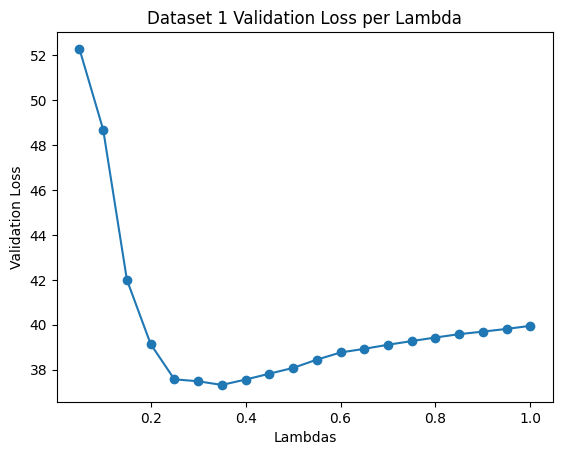

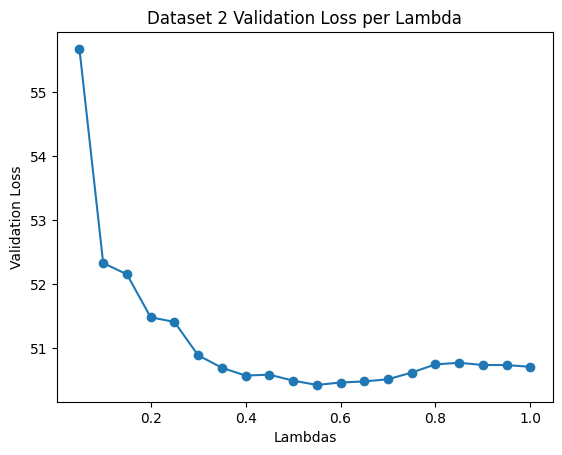

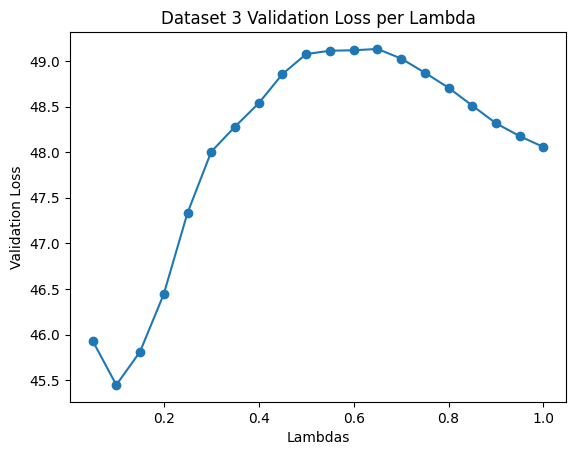

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Function that implements Coordinate Descent for LASSO Regression

def cd_lasso(y, X, beta=None, tol=1e-6, iter=1000, lambda_val=0.1):
    p = X.shape[1]
    n = X.shape[0]
    if beta is None:
        beta = np.zeros(p)

    def prox(z, lam):
        return np.sign(z) * np.maximum(np.abs(z) - lam, 0)

    denominator = np.sum(X ** 2, axis=0)
    r = y - X @ beta

    for _ in range(iter):
        beta_old = beta.copy()
        for j in range(p):
            xj = X[:, j]
            rj = r + beta[j] * xj
            numerator = xj @ rj
            beta[j] = prox(numerator, lambda_val) / denominator[j]
            r = rj - beta[j] * xj

        if np.sqrt(np.sum((beta - beta_old) ** 2)) < tol:
            break

    return beta


# PART A

data_dir = Path('.')

# Reading data

data1 = pd.read_csv(data_dir / "regression_data_node1.csv")
data2 = pd.read_csv(data_dir / "regression_data_node2.csv")
data3 = pd.read_csv(data_dir / "regression_data_node3.csv")
test_data = pd.read_csv(data_dir / "test_data.csv")

# Train/Validation splits

data1_train = data1.iloc[:160]
data1_val = data1.iloc[160:200]

data2_train = data2.iloc[:240]
data2_val = data2.iloc[240:300]

data3_train = data3.iloc[:400]
data3_val = data3.iloc[400:500]


test_y = test_data["y"].to_numpy(dtype=float)
test_x = test_data.drop(columns=["y"]).to_numpy()

# Divide by predictor/response

d1train_y = data1_train["y"].to_numpy(dtype=float)
d1train_x = data1_train.drop(columns=["y"]).to_numpy()
d1val_y = data1_val["y"].to_numpy(dtype=float)
d1val_x = data1_val.drop(columns=["y"]).to_numpy()

d2train_y = data2_train["y"].to_numpy(dtype=float)
d2train_x = data2_train.drop(columns=["y"]).to_numpy()
d2val_y = data2_val["y"].to_numpy(dtype=float)
d2val_x = data2_val.drop(columns=["y"]).to_numpy()

d3train_y = data3_train["y"].to_numpy(dtype=float)
d3train_x = data3_train.drop(columns=["y"]).to_numpy()
d3val_y = data3_val["y"].to_numpy(dtype=float)
d3val_x = data3_val.drop(columns=["y"]).to_numpy()


all_training = [
    [d1train_x, d1train_y, d1val_x, d1val_y],
    [d2train_x, d2train_y, d2val_x, d2val_y],
    [d3train_x, d3train_y, d3val_x, d3val_y],
]

potential_lambdas = np.arange(0.05, 1.01, 0.05)
best_lambda = np.zeros(3)
all_val_loss = [
    np.zeros(len(potential_lambdas)),
    np.zeros(len(potential_lambdas)),
    np.zeros(len(potential_lambdas)),
]

# Train all models

for i in range(3):
    lowest_error = np.inf
    for j, lam in enumerate(potential_lambdas):
        print(f"Trying lambda {lam} on dataset {i + 1}")

        trained_beta = cd_lasso(
            all_training[i][1],
            all_training[i][0],
            lambda_val=lam,
            iter=1000,
        )
        val_loss = np.sum((all_training[i][3] - all_training[i][2] @ trained_beta) ** 2) / (
            2 * all_training[i][2].shape[0]
        )

        all_val_loss[i][j] = val_loss

        if val_loss < lowest_error:
            lowest_error = val_loss
            best_lambda[i] = lam

    print(f"Finished dataset {i + 1}")

best_lambda

# 0.35, 0.55, 0.1

fit1 = cd_lasso(d1train_y, d1train_x, lambda_val=0.35, iter=1000)
fit2 = cd_lasso(d2train_y, d2train_x, lambda_val=0.55, iter=1000)
fit3 = cd_lasso(d3train_y, d3train_x, lambda_val=0.1, iter=1000)

all_val_loss

plt.figure()
plt.plot(potential_lambdas, all_val_loss[0], marker='o')
plt.title("Dataset 1 Validation Loss per Lambda")
plt.xlabel("Lambdas")
plt.ylabel("Validation Loss")
plt.show()

plt.figure()
plt.plot(potential_lambdas, all_val_loss[1], marker='o')
plt.title("Dataset 2 Validation Loss per Lambda")
plt.xlabel("Lambdas")
plt.ylabel("Validation Loss")
plt.show()

plt.figure()
plt.plot(potential_lambdas, all_val_loss[2], marker='o')
plt.title("Dataset 3 Validation Loss per Lambda")
plt.xlabel("Lambdas")
plt.ylabel("Validation Loss")
plt.show()

# Which coefficients are non-zero

np.where(fit1 != 0)[0] + 1
np.where(fit2 != 0)[0] + 1
np.where(fit3 != 0)[0] + 1

# Which coefficients are non-zero across all models

np.where((fit1 != 0) & (fit2 != 0) & (fit3 != 0))[0] + 1

# Test errors

np.sum((test_y - test_x @ fit1) ** 2) / (2 * test_x.shape[0])
np.sum((test_y - test_x @ fit2) ** 2) / (2 * test_x.shape[0])
np.sum((test_y - test_x @ fit3) ** 2) / (2 * test_x.shape[0])


# PART B

l1 = 40
l2 = 40
l3 = 100
beta_common = np.zeros(600)
beta_common_old = beta_common.copy()
iterations = 5

while np.sqrt(np.sum((beta_common - beta_common_old) ** 2)) < 1e-6:
    beta1 = cd_lasso(d1train_y, d1train_x, beta=beta_common, iter=iterations, lambda_val=l1)
    beta2 = cd_lasso(d2train_y, d2train_x, beta=beta_common, iter=iterations, lambda_val=l2)
    beta3 = cd_lasso(d3train_y, d3train_x, beta=beta_common, iter=iterations, lambda_val=l3)

    beta_common_old = beta_common
    beta_common = (200 / 1000) * beta1 + (300 / 1000) * beta2 + (500 / 1000) * beta3

# Independent validation errors, used to tune l1, l2, l3 by brute-force

np.sum((d1val_y - d1val_x @ beta_common) ** 2) / (2 * d1val_x.shape[0])
np.sum((d2val_y - d2val_x @ beta_common) ** 2) / (2 * d2val_x.shape[0])
np.sum((d3val_y - d3val_x @ beta_common) ** 2) / (2 * d3val_x.shape[0])

# Which coefficients are non-zero

np.where(beta_common != 0)[0] + 1

# Confusion Matrix computations

truth = np.where(beta_common == 0, 0, 1)
pred1 = np.where(fit1 == 0, 0, 1)
pred2 = np.where(fit2 == 0, 0, 1)
pred3 = np.where(fit3 == 0, 0, 1)

# Dataset 1 Confusion Matrix

pd.DataFrame(
    {
        "Truth/Predicted": ["True 1", "True 0"],
        "Predicted 1": [np.sum((truth == 1) & (pred1 == 1)), np.sum((truth == 0) & (pred1 == 1))],
        "Predicted 0": [np.sum((truth == 1) & (pred1 == 0)), np.sum((truth == 0) & (pred1 == 0))],
    }
)

# Dataset 2 Confusion Matrix

pd.DataFrame(
    {
        "Truth/Predicted": ["True 1", "True 0"],
        "Predicted 1": [np.sum((truth == 1) & (pred2 == 1)), np.sum((truth == 0) & (pred2 == 1))],
        "Predicted 0": [np.sum((truth == 1) & (pred2 == 0)), np.sum((truth == 0) & (pred2 == 0))],
    }
)

# Dataset 3 Confusion Matrix

pd.DataFrame(
    {
        "Truth/Predicted": ["True 1", "True 0"],
        "Predicted 1": [np.sum((truth == 1) & (pred3 == 1)), np.sum((truth == 0) & (pred3 == 1))],
        "Predicted 0": [np.sum((truth == 1) & (pred3 == 0)), np.sum((truth == 0) & (pred3 == 0))],
    }
)

# Test error

np.sum((test_y - test_x @ beta_common) ** 2) / (2 * test_x.shape[0])

# Re-Run for 10 iterations

l1 = 40
l2 = 40
l3 = 100
beta_common = np.zeros(600)
beta_common_old = beta_common.copy()
iterations = 10

while np.sqrt(np.sum((beta_common - beta_common_old) ** 2)) < 1e-6:
    beta1 = cd_lasso(d1train_y, d1train_x, beta=beta_common, iter=iterations, lambda_val=l1)
    beta2 = cd_lasso(d2train_y, d2train_x, beta=beta_common, iter=iterations, lambda_val=l2)
    beta3 = cd_lasso(d3train_y, d3train_x, beta=beta_common, iter=iterations, lambda_val=l3)

    beta_common_old = beta_common
    beta_common = (200 / 1000) * beta1 + (300 / 1000) * beta2 + (500 / 1000) * beta3

# Independent validation errors, used to tune l1, l2, l3 by brute-force

np.sum((d1val_y - d1val_x @ beta_common) ** 2) / (2 * d1val_x.shape[0])
np.sum((d2val_y - d2val_x @ beta_common) ** 2) / (2 * d2val_x.shape[0])
np.sum((d3val_y - d3val_x @ beta_common) ** 2) / (2 * d3val_x.shape[0])

# Which coefficients are non-zero

np.where(beta_common != 0)[0] + 1

# Confusion Matrix computations

truth = np.where(beta_common == 0, 0, 1)
pred1 = np.where(fit1 == 0, 0, 1)
pred2 = np.where(fit2 == 0, 0, 1)
pred3 = np.where(fit3 == 0, 0, 1)

# Dataset 1 Confusion Matrix

pd.DataFrame(
    {
        "Truth/Predicted": ["True 1", "True 0"],
        "Predicted 1": [np.sum((truth == 1) & (pred1 == 1)), np.sum((truth == 0) & (pred1 == 1))],
        "Predicted 0": [np.sum((truth == 1) & (pred1 == 0)), np.sum((truth == 0) & (pred1 == 0))],
    }
)

# Dataset 2 Confusion Matrix

pd.DataFrame(
    {
        "Truth/Predicted": ["True 1", "True 0"],
        "Predicted 1": [np.sum((truth == 1) & (pred2 == 1)), np.sum((truth == 0) & (pred2 == 1))],
        "Predicted 0": [np.sum((truth == 1) & (pred2 == 0)), np.sum((truth == 0) & (pred2 == 0))],
    }
)

# Dataset 3 Confusion Matrix

pd.DataFrame(
    {
        "Truth/Predicted": ["True 1", "True 0"],
        "Predicted 1": [np.sum((truth == 1) & (pred3 == 1)), np.sum((truth == 0) & (pred3 == 1))],
        "Predicted 0": [np.sum((truth == 1) & (pred3 == 0)), np.sum((truth == 0) & (pred3 == 0))],
    }
)

# Test error

np.sum((test_y - test_x @ beta_common) ** 2) / (2 * test_x.shape[0])

